### Creo lista dei path e carico i databases

In [12]:
import numpy as np

rv = [26.0, 58.0]
paths = []
for r in rv:
    paths.append(f"/scratch/scarpolini/databases/db_lorenz_{r:.1f}.npy")
print(paths)

dbs = []
for path in paths:
    dbs.append(np.load(path))

### Calcolo funzioni di autocorrelazione e le plotto

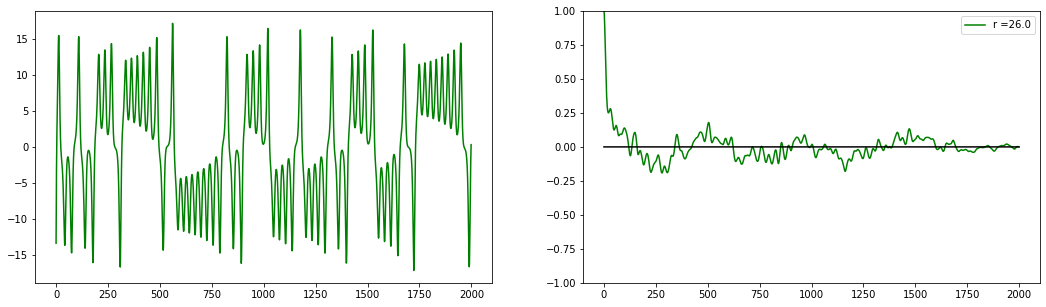

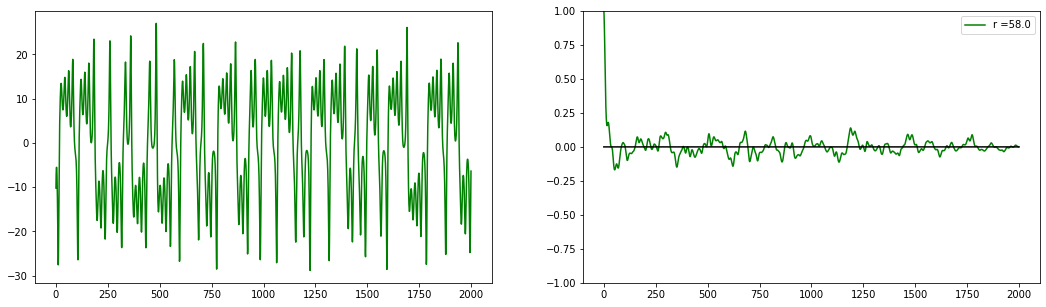

In [16]:
def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / result[result.size // 2:].max()

import matplotlib.pyplot as plt
for db, r in zip(dbs, rv):
    n = round(np.random.uniform(len(db[:,0,0])))
    a = db[n,0,:]
    a = a - np.mean(a)
    #b = db[n,1,:]
    #b = b - np.mean(b)
    #c = db[n,2,:]
    #c = c - np.mean(c)
    acfx = acf(a)
    #acfy = acf(b)
    #acfz = acf(c)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
    ax1.plot(a, color="g", label=f"r ={r}")
    #ax1.plot(b, color="b")
    #ax1.plot(c, color="r")
    ax2.plot(acfx, color="g", label=f"r ={r}")
    #ax2.plot(acfy, color="b")
    #ax2.plot(acfz, color="r")
    ax2.plot(np.zeros(2000),color="black")
    ax2.set_ylim([-1.,1])
    plt.legend()
    plt.show()